# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
from IPython.display import display, Markdown
with open('../Readme.md', 'r') as fh:
    content = fh.read()

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [75]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [76]:
#create lists to hold names of cities and countries 
random_city = []
random_country = []
loopcount = 0 
#loop through cities to get 650 random city names 
while len(random_city) < 631:
    loopcount += 1 

    lat_position = random.randint(0,2)
    base_lat = random.randint(0,91)
    dec_lat = random.random()/100
    lat = base_lat + dec_lat 
    if lat_position == 1:
        lat = lat * -1
    #print(f"The latitude is:{lat}")
    lng_position = random.randint(0,2)
    base_long = random.randint(0,181)
    dec_long = random.random()/100
    lng = base_long + dec_long 
    if lng_position == 1:
        lng = lng * -1
    #print(f"The longitude is:{long}")
    
    #use citipy to get nearest city using lat and long
    city = citipy.nearest_city(lat, lng)
    foundCity = False
    for x in range(len(random_city)):
        if city.city_name == random_city[x]:
            foundCity = True
    if foundCity==False:
        random_city.append(city.city_name)
        random_country.append(city.country_code)

In [77]:
# Build query Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "362d2ce77ac1347c707f15a319677c99"
units = "imperial"
query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [78]:
print(query_url + "Chicago")

http://api.openweathermap.org/data/2.5/weather?appid=362d2ce77ac1347c707f15a319677c99&units=imperial&q=Chicago


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [79]:
#loop through list and make requests 
search_data = []
cityList = []
countryList = []

searchCnt = 0
for city in random_city:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {city}")   
    response = requests.get(query_url + city).json()
    searchCityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {city}    city id: {searchCityID}")
        search_data.append(response)
        cityList.append(city)
        countryList.append(random_country[searchCnt-1])
    else:
        print(f"     No weather record found for city: {city}")    
        print("************************************************")

Processing record 1 for the city: marcona
     No weather record found for city: marcona
************************************************
Processing record 2 for the city: chokurdakh
     Record found for city: chokurdakh    city id: 2126123
Processing record 3 for the city: samusu
     No weather record found for city: samusu
************************************************
Processing record 4 for the city: sistranda
     Record found for city: sistranda    city id: 3139597
Processing record 5 for the city: rapid valley
     Record found for city: rapid valley    city id: 5768244
Processing record 6 for the city: puerto ayora
     Record found for city: puerto ayora    city id: 3652764
Processing record 7 for the city: hobart
     Record found for city: hobart    city id: 2163355
Processing record 8 for the city: oranjemund
     Record found for city: oranjemund    city id: 3354071
Processing record 9 for the city: avarua
     Record found for city: avarua    city id: 4035715
Processi

     Record found for city: lagoa    city id: 2267254
Processing record 80 for the city: telimele
     Record found for city: telimele    city id: 2414926
Processing record 81 for the city: lebu
     Record found for city: lebu    city id: 344979
Processing record 82 for the city: uwayl
     No weather record found for city: uwayl
************************************************
Processing record 83 for the city: srednekolymsk
     Record found for city: srednekolymsk    city id: 2121025
Processing record 84 for the city: itarema
     Record found for city: itarema    city id: 3393692
Processing record 85 for the city: karpathos
     Record found for city: karpathos    city id: 260895
Processing record 86 for the city: romans-sur-isere
     Record found for city: romans-sur-isere    city id: 2983011
Processing record 87 for the city: busselton
     Record found for city: busselton    city id: 2075265
Processing record 88 for the city: tasiilaq
     Record found for city: tasiilaq    ci

     Record found for city: dengzhou    city id: 1812990
Processing record 157 for the city: phrai bung
     No weather record found for city: phrai bung
************************************************
Processing record 158 for the city: barentsburg
     No weather record found for city: barentsburg
************************************************
Processing record 159 for the city: punta arenas
     Record found for city: punta arenas    city id: 3874787
Processing record 160 for the city: pangody
     Record found for city: pangody    city id: 1495626
Processing record 161 for the city: sibu
     Record found for city: sibu    city id: 1735902
Processing record 162 for the city: ilulissat
     Record found for city: ilulissat    city id: 3423146
Processing record 163 for the city: belushya guba
     No weather record found for city: belushya guba
************************************************
Processing record 164 for the city: clyde river
     Record found for city: clyde river  

     Record found for city: biltine    city id: 244878
Processing record 234 for the city: olafsvik
     No weather record found for city: olafsvik
************************************************
Processing record 235 for the city: mingaora
     Record found for city: mingaora    city id: 1170395
Processing record 236 for the city: agdam
     Record found for city: agdam    city id: 148619
Processing record 237 for the city: chuy
     Record found for city: chuy    city id: 3443061
Processing record 238 for the city: mys shmidta
     No weather record found for city: mys shmidta
************************************************
Processing record 239 for the city: zhigansk
     Record found for city: zhigansk    city id: 2012530
Processing record 240 for the city: bababe
     No weather record found for city: bababe
************************************************
Processing record 241 for the city: berlevag
     Record found for city: berlevag    city id: 780687
Processing record 242 f

     Record found for city: yar-sale    city id: 1486321
Processing record 313 for the city: tondano
     Record found for city: tondano    city id: 1623424
Processing record 314 for the city: tabiauea
     No weather record found for city: tabiauea
************************************************
Processing record 315 for the city: mormugao
     No weather record found for city: mormugao
************************************************
Processing record 316 for the city: petrovskoye
     Record found for city: petrovskoye    city id: 547523
Processing record 317 for the city: sao joao da barra
     Record found for city: sao joao da barra    city id: 3448903
Processing record 318 for the city: husavik
     Record found for city: husavik    city id: 5961417
Processing record 319 for the city: iqaluit
     Record found for city: iqaluit    city id: 5983720
Processing record 320 for the city: dekar
     Record found for city: dekar    city id: 933815
Processing record 321 for the city: p

     Record found for city: dudinka    city id: 1507116
Processing record 391 for the city: urengoy
     Record found for city: urengoy    city id: 1488414
Processing record 392 for the city: banjarmasin
     Record found for city: banjarmasin    city id: 1650213
Processing record 393 for the city: kumba
     Record found for city: kumba    city id: 2229752
Processing record 394 for the city: qurayyat
     No weather record found for city: qurayyat
************************************************
Processing record 395 for the city: gobabis
     Record found for city: gobabis    city id: 3357247
Processing record 396 for the city: krasnoselkup
     No weather record found for city: krasnoselkup
************************************************
Processing record 397 for the city: karaul
     No weather record found for city: karaul
************************************************
Processing record 398 for the city: songling
     Record found for city: songling    city id: 1898494
Processi

     No weather record found for city: grand river south east
************************************************
Processing record 468 for the city: bowmore
     Record found for city: bowmore    city id: 4486983
Processing record 469 for the city: fare
     Record found for city: fare    city id: 4034496
Processing record 470 for the city: tura
     Record found for city: tura    city id: 1254046
Processing record 471 for the city: dunedin
     Record found for city: dunedin    city id: 2191562
Processing record 472 for the city: colares
     Record found for city: colares    city id: 2269142
Processing record 473 for the city: kifri
     Record found for city: kifri    city id: 94298
Processing record 474 for the city: bengkulu
     No weather record found for city: bengkulu
************************************************
Processing record 475 for the city: yuli
     Record found for city: yuli    city id: 2347468
Processing record 476 for the city: oktyabrskoye
     Record found for 

     Record found for city: assiniboia    city id: 5887798
Processing record 546 for the city: araouane
     Record found for city: araouane    city id: 2460954
Processing record 547 for the city: kanker
     Record found for city: kanker    city id: 1268031
Processing record 548 for the city: komsomolskiy
     Record found for city: komsomolskiy    city id: 1486910
Processing record 549 for the city: sao filipe
     Record found for city: sao filipe    city id: 3374210
Processing record 550 for the city: kazanka
     Record found for city: kazanka    city id: 706580
Processing record 551 for the city: los llanos de aridane
     Record found for city: los llanos de aridane    city id: 2514651
Processing record 552 for the city: kadambur
     Record found for city: kadambur    city id: 1268693
Processing record 553 for the city: kingisepp
     Record found for city: kingisepp    city id: 548602
Processing record 554 for the city: ahrarne
     No weather record found for city: ahrarne
**

     Record found for city: makakilo city    city id: 5850554
Processing record 626 for the city: manikpur
     Record found for city: manikpur    city id: 1263715
Processing record 627 for the city: edd
     Record found for city: edd    city id: 338345
Processing record 628 for the city: westport
     Record found for city: westport    city id: 2960970
Processing record 629 for the city: coquimbo
     Record found for city: coquimbo    city id: 3893629
Processing record 630 for the city: keshan
     No weather record found for city: keshan
************************************************
Processing record 631 for the city: vysokogornyy
     Record found for city: vysokogornyy    city id: 2013216


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
#Print the length of the lists to confirm the data was collected properly
len(search_data)
len(cloud_data)
len(countryList)
len(humid_data)
len(lat_data)
len(lng_data)
len(temp_data)
len(wind_data)

546

In [58]:
# Use list comprehension to gather necessary data series

lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("Temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

In [59]:

# Create data frame with aggregated data
weather_data = pd.DataFrame({"City":cityList,
                            "Cloudiness":cloud_data,
                            "Country":countryList,
                            "Humidity":humid_data,
                            "Lat":lat_data,
                            "Lng":lng_data,
                            "Temp":temp_data,
                            "Wind Speed":wind_data})

In [64]:
# Create data frame with aggregated data
weather_data = pd.DataFrame({"City":cityList,
                            "Cloudiness":cloud_data,
                            "Country":countryList,
                            "Humidity":humid_data,
                            "Lat":lat_data,
                            "Lng":lng_data,
                            "Max Temp":temp_data,
                            "Wind Speed":wind_data})

In [65]:
# Force column order
weather_data = weather_data[["City","Cloudiness", "Country","Humidity","Lat","Lng","Max Temp","Humidity","Wind Speed"]]
weather_data.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Humidity,Wind Speed
0,kapaa,75,us,83,22.08,-159.32,79.83,83,8.05
1,saint george,20,bm,48,39.45,22.34,83.12,48,3.78
2,marhaura,40,in,50,25.97,84.87,96.80,50,3.36
3,longyearbyen,40,sj,65,78.22,15.63,44.60,65,9.17
4,albany,90,au,100,42.65,-73.75,74.89,100,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

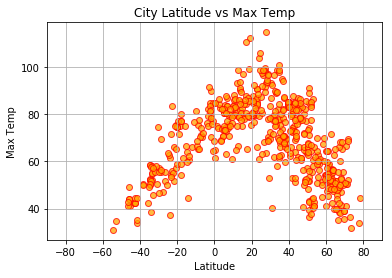

In [68]:
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

# Latitude vs Temp
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", facecolors="orange", edgecolors="red", alpha=0.75)

# Add chart labels
plt.title("City Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Max Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

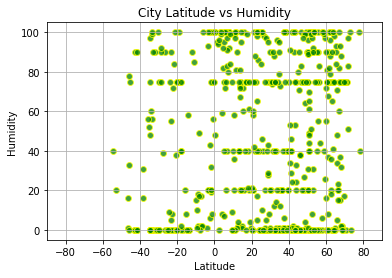

In [89]:

# Latitude vs Humidity
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", facecolors="green", edgecolors="yellow", alpha=0.75)

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

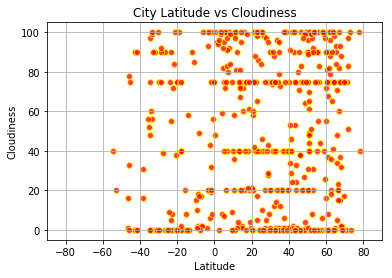

In [92]:

# Latitude vs Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", facecolors="red", edgecolors="yellow", alpha=0.75)

# Add chart labels
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

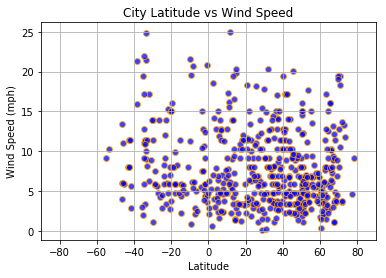

In [72]:
# Latitude vs Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", facecolors="blue", edgecolors="orange", alpha=0.75)

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()